In [42]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold


pd.set_option('display.max_columns', None)

In [81]:
train = pd.read_parquet("../experiment/exp_00106/output/train_fe.parquet")

In [82]:
train.head()

customer_ID  P_2_mean   P_2_std  \
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.933824  0.024194   
1  00000fd6641609c6ece5454664794f0340ad84dddce9a2...  0.899820  0.022119   
2  00001b22f846c82c51f6e3958ccd81970162bae8b007e8...  0.878454  0.028911   
3  000041bdba6ecadd89a52d11886e8eaaec9325906c9723...  0.598969  0.020107   
4  00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...  0.891679  0.042325   

    P_2_min   P_2_max  P_2_last  P_2_first  D_39_mean  D_39_std  D_39_min  \
0  0.868580  0.960384  0.934745   0.938469   0.230769  0.832050       0.0   
1  0.861109  0.929122  0.880519   0.929122   7.153846  6.743468       0.0   
2  0.797670  0.904482  0.880875   0.876615   0.000000  0.000000       0.0   
3  0.567442  0.623392  0.621776   0.567442   1.538462  3.017045       0.0   
4  0.805045  0.940382  0.871900   0.936842   0.000000  0.000000       0.0   

   D_39_max  D_39_last  D_39_first  B_1_mean   B_1_std   B_1_min   B_1_max  \
0       3.0        0.0         0.0  0.012007  0.006547  0.001930  0.021655   
1      19.0        6.0        13.0  0.025654  0.027756  0.006711  0.109644   
2       0.0        0.0         0.0  0.004386  0.002786  0.001472  0.009997   
3       9.0        0.0         9.0  0.059876  0.080531  0.005910  0.279991   
4       0.0        0.0         0.0  0.005941  0.002475  0.000776  0.009806   

   B_1_last  B_1_first  B_2_mean   B_2_std   B_2_min   B_2_max  B_2_last  \
0  0.009382   0.008724  1.005086  0.003222  1.000242  1.009672  1.007647   
1  0.034684   0.025782  0.991083  0.051531  0.819772  1.008534  1.004028   
2  0.004284   0.001472  0.815677  0.003545  0.810796  0.819987  0.812649   
3  0.012564   0.070311  0.955264  0.080981  0.812053  1.009999  1.006183   
4  0.007679   0.003433  0.814543  0.003143  0.810670  0.819947  0.815746   

   B_2_first  R_1_mean   R_1_std   R_1_min   R_1_max  R_1_last  R_1_first  \
0   1.006838  0.004509  0.003081  0.000263  0.009228  0.006104   0.009228   
1   1.002647  0.006246  0.002129  0.001023  0.008996  0.006911   0.005515   
2   0.810796  0.006621  0.001919  0.003540  0.009443  0.006450   0.005955   
3   0.812053  0.005665  0.003473  0.000199  0.009915  0.007829   0.004228   
4   0.818691  0.004180  0.002581  0.000336  0.009076  0.001247   0.007243   

   S_3_mean   S_3_std   S_3_min   S_3_max  S_3_last  S_3_first  D_41_mean  \
0  0.113215  0.011670  0.098882  0.135021  0.135021   0.124035        0.0   
1  0.120578  0.023824  0.089799  0.165509  0.165509   0.089799        0.0   
2       NaN       NaN       NaN       NaN       NaN        NaN        0.0   
3  0.247750  0.095122  0.149216  0.407420  0.287766   0.407420        0.0   
4  0.173102  0.004669  0.166190  0.176403  0.176403   0.166190        0.0   

   D_41_std  D_41_min  D_41_max  D_41_last  D_41_first  B_3_mean   B_3_std  \
0       0.0       0.0       0.0        0.0         0.0  0.006456  0.002942   
1       0.0       0.0       0.0        0.0         0.0  0.005663  0.003354   
2       0.0       0.0       0.0        0.0         0.0  0.005493  0.002834   
3       0.0       0.0       0.0        0.0         0.0  0.006423  0.003360   
4       0.0       0.0       0.0        0.0         0.0  0.005088  0.002910   

    B_3_min   B_3_max  B_3_last  B_3_first  D_42_mean  D_42_std  D_42_min  \
0  0.000783  0.009866  0.007174   0.004709        NaN       NaN       NaN   
1  0.000861  0.012861  0.005068   0.005830        NaN       NaN       NaN   
2  0.000626  0.009383  0.007196   0.004826        NaN       NaN       NaN   
3  0.000053  0.010927  0.009937   0.010927        NaN       NaN       NaN   
4  0.000049  0.009686  0.005528   0.005927        NaN       NaN       NaN   

   D_42_max  D_42_last  D_42_first  D_43_mean  D_43_std  D_43_min  D_43_max  \
0       NaN        NaN         NaN        NaN       NaN       NaN       NaN   
1       NaN        NaN         NaN   0.144571  0.169598  0.060646  0.525600   
2       NaN        NaN         NaN        NaN       NaN       NaN       NaN   
3       NaN        Na

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458913 entries, 0 to 458912
Columns: 2524 entries, customer_ID to target
dtypes: float32(2478), int32(22), int64(12), int8(11), object(1)
memory usage: 4.3+ GB


## Remove Low Variance

In [84]:
train_num = train.select_dtypes(include=["float32"])

In [6]:
(train_num.var(axis=0) == 0.0).sum()

1

In [7]:
(train_num.var(axis=0) < 0.005).sum()

217

In [8]:
(train_num.var(axis=0) < 0.01).sum()

336

In [9]:

(train_num.var(axis=0) < 0.05).sum()

785

In [10]:

(train_num.var(axis=0) < 0.1).sum()

1106

In [11]:
def get_low_variance_columns(data: pd.DataFrame, threshold: int = 0.0):
    cols = data.columns[(data.var(axis=0) <= threshold)].tolist()
    return cols

In [12]:
get_low_variance_columns(train_num, 0.0)

['R_23_min']

## Check Unique Count

In [85]:
nunique_dict = train_num.nunique().to_dict()

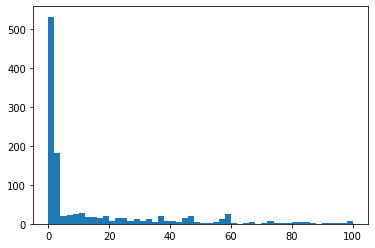

In [86]:
import matplotlib.pyplot as plt

tmp = np.array(list(nunique_dict.values()))
tmp = tmp[tmp <= 100]

plt.hist(tmp, bins=50)
plt.show()

In [87]:
threshold = 20
low_nunique_cols = []

for f_name, nunique in nunique_dict.items():
    if nunique <= threshold and nunique > 3:
        low_nunique_cols.append(f_name)


print(f"Length of low_nunique_cols is {len(low_nunique_cols)}, threshold={threshold}")

Length of low_nunique_cols is 170, threshold=20


In [88]:
train_num[low_nunique_cols].describe()

,D_51_min,D_51_max,D_51_last,D_51_first,B_16_min,B_16_max,B_16_last,B_16_first,B_20_min,B_20_max,B_20_last,B_20_first,S_13_min,S_13_max,S_13_last,S_13_first,B_22_min,B_22_max,B_22_last,B_22_first,D_70_min,D_70_first,D_72_min,D_72_max,D_72_last,D_72_first,D_78_min,D_78_first,D_79_min,D_79_first,R_8_min,R_8_first,R_9_min,R_9_max,R_9_last,R_9_first,R_10_min,R_10_max,R_10_last,R_10_first,R_11_min,R_11_max,R_11_last,R_11_first,D_81_min,D_81_max,D_81_last,D_81_first,D_82_min,D_82_max,D_82_last,D_82_first,R_13_min,R_13_first,D_83_min,D_84_min,R_16_min,R_16_first,R_17_min,R_17_first,R_18_min,R_18_max,R_18_last,R_18_first,R_20_min,D_89_min,D_89_max,D_89_last,D_89_first,D_91_min,D_91_max,D_91_last,D_91_first,D_107_min,D_107_max,D_107_last,D_107_first,D_108_max,D_108_last,D_108_first,D_109_std,D_111_min,D_111_max,D_111_last,D_111_first,D_113_min,D_113_last,D_113_first,D_122_min,D_122_max,D_122_last,D_122_first,D_123_max,D_123_last,D_123_first,D_125_min,D_125_max,D_125_last,D_125_first,B_41_min,B_41_max,B_41_last,B_41_first,D_136_min,D_136_max,D_136_last,D_136_first,D_138_min,D_138_max,D_138_last,D_138_first,D_51_last_round2,D_54_last_round2,B_16_last_round2,B_20_last_round2,S_13_last_round2,B_22_last_round2,D_72_last_round2,R_9_last_round2,R_10_last_round2,R_11_last_round2,D_81_last_round2,D_82_last_round2,R_18_last_round2,S_19_last_round2,D_89_last_round2,R_23_div_last_first,D_91_last_round2,D_104_last_round2,D_107_last_round2,R_27_last_round2,D_108_last_round2,D_111_last_round2,D_112_last_round2,D_113_last_round2,D_122_last_round2,D_123_last_round2,D_125_last_round2,D_128_last_round2,B_41_last_round2,D_130_last_round2,D_136_last_round2,D_138_last_round2,D_51_diff,B_22_diff,D_70_diff,D_72_diff,R_9_diff,D_81_diff,D_82_diff,R_18_diff,B_33_diff,D_89_diff,D_91_diff,D_92_diff,D_103_diff,D_107_diff,R_26_diff,D_108_diff,D_111_diff,D_123_diff,D_125_diff,D_129_diff,B_41_diff,D_135_diff,D_136_diff,D_137_diff,D_138_diff,D_139_diff,D_143_diff
count,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,453793.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458882.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,425.000000,458913.000000,456381.000000,458913.000000,431925.000000,458913.000000,458913.000000,458882.000000,458913.000000,458913.000000,458913.000000,458913.000000,456381.000000,458913.000000,456381.000000,458913.000000,458913.000000,453793.000000,453793.000000,453793.00000

In [89]:
train_num[low_nunique_cols].isnull().mean().max()

0.9990738985385029

In [90]:
train_num[low_nunique_cols].min().min()

-62.0

In [64]:
def get_low_nunique_cols(data, threshold):
    nunique_dict = data.nunique().to_dict()

    low_nunique_cols = []
    for f_name, nunique in nunique_dict.items():
        if nunique <= threshold:
            low_nunique_cols.append(f_name)

    return low_nunique_cols

def convert_float_to_int(data, convert_cols, fill_value=-999):
    tmp = data[convert_cols].fillna(fill_value).astype(np.int32).copy()
    tmp.replace(-999, np.nan, inplace=True)

    data.drop(convert_cols, axis=1, inplace=True)
    return pd.concat([data, tmp], axis=1)

    

In [91]:
convert_cols = get_low_nunique_cols(train.select_dtypes(include=["float32"]), threshold=20)

In [92]:
train = convert_float_to_int(train, convert_cols)

In [93]:
train.head()

customer_ID  P_2_mean   P_2_std  \
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.933824  0.024194   
1  00000fd6641609c6ece5454664794f0340ad84dddce9a2...  0.899820  0.022119   
2  00001b22f846c82c51f6e3958ccd81970162bae8b007e8...  0.878454  0.028911   
3  000041bdba6ecadd89a52d11886e8eaaec9325906c9723...  0.598969  0.020107   
4  00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...  0.891679  0.042325   

    P_2_min   P_2_max  P_2_last  P_2_first  D_39_mean  D_39_std  D_39_min  \
0  0.868580  0.960384  0.934745   0.938469   0.230769  0.832050       0.0   
1  0.861109  0.929122  0.880519   0.929122   7.153846  6.743468       0.0   
2  0.797670  0.904482  0.880875   0.876615   0.000000  0.000000       0.0   
3  0.567442  0.623392  0.621776   0.567442   1.538462  3.017045       0.0   
4  0.805045  0.940382  0.871900   0.936842   0.000000  0.000000       0.0   

   D_39_max  D_39_last  D_39_first  B_1_mean   B_1_std   B_1_min   B_1_max  \
0       3.0        0.0         0.0  0.012007  0.006547  0.001930  0.021655   
1      19.0        6.0        13.0  0.025654  0.027756  0.006711  0.109644   
2       0.0        0.0         0.0  0.004386  0.002786  0.001472  0.009997   
3       9.0        0.0         9.0  0.059876  0.080531  0.005910  0.279991   
4       0.0        0.0         0.0  0.005941  0.002475  0.000776  0.009806   

   B_1_last  B_1_first  B_2_mean   B_2_std   B_2_min   B_2_max  B_2_last  \
0  0.009382   0.008724  1.005086  0.003222  1.000242  1.009672  1.007647   
1  0.034684   0.025782  0.991083  0.051531  0.819772  1.008534  1.004028   
2  0.004284   0.001472  0.815677  0.003545  0.810796  0.819987  0.812649   
3  0.012564   0.070311  0.955264  0.080981  0.812053  1.009999  1.006183   
4  0.007679   0.003433  0.814543  0.003143  0.810670  0.819947  0.815746   

   B_2_first  R_1_mean   R_1_std   R_1_min   R_1_max  R_1_last  R_1_first  \
0   1.006838  0.004509  0.003081  0.000263  0.009228  0.006104   0.009228   
1   1.002647  0.006246  0.002129  0.001023  0.008996  0.006911   0.005515   
2   0.810796  0.006621  0.001919  0.003540  0.009443  0.006450   0.005955   
3   0.812053  0.005665  0.003473  0.000199  0.009915  0.007829   0.004228   
4   0.818691  0.004180  0.002581  0.000336  0.009076  0.001247   0.007243   

   S_3_mean   S_3_std   S_3_min   S_3_max  S_3_last  S_3_first  D_41_mean  \
0  0.113215  0.011670  0.098882  0.135021  0.135021   0.124035        0.0   
1  0.120578  0.023824  0.089799  0.165509  0.165509   0.089799        0.0   
2       NaN       NaN       NaN       NaN       NaN        NaN        0.0   
3  0.247750  0.095122  0.149216  0.407420  0.287766   0.407420        0.0   
4  0.173102  0.004669  0.166190  0.176403  0.176403   0.166190        0.0   

   D_41_std  D_41_min  D_41_max  D_41_last  D_41_first  B_3_mean   B_3_std  \
0       0.0       0.0       0.0        0.0         0.0  0.006456  0.002942   
1       0.0       0.0       0.0        0.0         0.0  0.005663  0.003354   
2       0.0       0.0       0.0        0.0         0.0  0.005493  0.002834   
3       0.0       0.0       0.0        0.0         0.0  0.006423  0.003360   
4       0.0       0.0       0.0        0.0         0.0  0.005088  0.002910   

    B_3_min   B_3_max  B_3_last  B_3_first  D_42_mean  D_42_std  D_42_min  \
0  0.000783  0.009866  0.007174   0.004709        NaN       NaN       NaN   
1  0.000861  0.012861  0.005068   0.005830        NaN       NaN       NaN   
2  0.000626  0.009383  0.007196   0.004826        NaN       NaN       NaN   
3  0.000053  0.010927  0.009937   0.010927        NaN       NaN       NaN   
4  0.000049  0.009686  0.005528   0.005927        NaN       NaN       NaN   

   D_42_max  D_42_last  D_42_first  D_43_mean  D_43_std  D_43_min  D_43_max  \
0       NaN        NaN         NaN        NaN       NaN       NaN       NaN   
1       NaN        NaN         NaN   0.144571  0.169598  0.060646  0.525600   
2       NaN        NaN         NaN        NaN       NaN       NaN       NaN   
3       NaN        Na